<a href="https://colab.research.google.com/github/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/blob/main/Chapter02/Detectron2-Chapter02-Panoptic%20Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

Should change runtime to have GPU Hardware accelerator: Runtime > Change runtime > Hardware accelerator: GPU.

In [ ]:
!python --version

In [ ]:
import torch
print(torch.__version__)

1.12.1+cu113


In [ ]:
!python -m pip install \
'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-_3pk4bha
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-_3pk4bha
     |████████████████████████████████| 50 kB 4.3 MB/s 
     |████████████████████████████████| 79 kB 10.1 MB/s 
     |████████████████████████████████| 151 kB 69.2 MB/s 
     |████████████████████████████████| 1.4 MB 67.0 MB/s 
     |████████████████████████████████| 509 kB 71.0 MB/s 
     |████████████████████████████████| 248 kB 66.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 843 kB 62.1 MB/s 
     |████████████████████████████████| 96 kB 7.6 MB/s 
     |████████████████████████████████| 117 kB 75.0 MB/s 
  Created whe

# Get a predictor

In [ ]:
import detectron2
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
# Suppress some user warnings
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
# Select a model
config_file = "COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"
checkpoint_url = "COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"
# Create a configuration file
cfg = get_cfg()
config_file = model_zoo.get_config_file(config_file)
cfg.merge_from_file(config_file)
# Download weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(checkpoint_url)
score_thresh_test = 0.95
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = score_thresh_test
predictor = DefaultPredictor(cfg)

model_final_cafdb1.pkl: 261MB [00:12, 20.9MB/s]                           


# Perform inference

In [ ]:
!wget https://raw.githubusercontent.com/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/main/datasets/960x720image/input.jpg

In [ ]:
import cv2
input_url = "input.jpg"
img = cv2.imread(input_url)
output = predictor(img)

In [ ]:
print(output)

{'sem_seg': tensor([[[ 1.9076,  1.9127,  1.9549,  ...,  2.8527,  2.7006,  2.5891],
         [ 1.9207,  1.9262,  1.9720,  ...,  2.8809,  2.7275,  2.6168],
         [ 2.0297,  2.0388,  2.1149,  ...,  3.1163,  2.9521,  2.8470],
         ...,
         [ 1.5271,  1.5295,  1.5490,  ...,  0.7355,  0.6508,  0.5826],
         [ 1.6189,  1.6183,  1.6137,  ...,  0.6889,  0.6208,  0.5542],
         [ 1.6299,  1.6290,  1.6215,  ...,  0.6833,  0.6172,  0.5508]],

        [[-0.5089, -0.5082, -0.5022,  ...,  0.1744,  0.0574, -0.0529],
         [-0.5071, -0.5063, -0.4993,  ...,  0.1840,  0.0667, -0.0439],
         [-0.4919, -0.4901, -0.4750,  ...,  0.2643,  0.1438,  0.0310],
         ...,
         [-1.9926, -1.9977, -2.0399,  ..., -2.3555, -2.3486, -2.3030],
         [-1.9268, -1.9324, -1.9791,  ..., -2.3512, -2.3450, -2.2979],
         [-1.9189, -1.9246, -1.9718,  ..., -2.3507, -2.3446, -2.2973]],

        [[-2.3787, -2.3790, -2.3821,  ..., -2.4682, -2.4532, -2.4558],
         [-2.3741, -2.3745, -2.37

In [ ]:
output["panoptic_seg"][0].shape

torch.Size([720, 960])

# Visualization

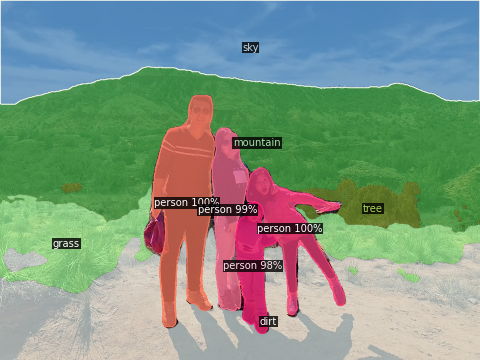

In [ ]:
from google.colab.patches import cv2_imshow
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
v = Visualizer(img[:, :, ::-1], metadata, scale=0.5)

panoptic_seg, segments_info = output["panoptic_seg"]
annotated_img = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)

cv2_imshow(annotated_img.get_image()[:, :, ::-1])